# Problem Statement:

##### To analyze customer data from an online retail plateform to segment customers based on their purchasing behaviour, preferences and demographics. The goal is to gain insight into distint customer segments and tailor marketing stratiegies to target each segment effectivelly.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:

df.shape

(541909, 8)

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#df.drop(columns=['CustomerID'],axis=1,inplace=True)

In [10]:
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
df['Description']=df['Description'].str.lower()

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
#filter the transation with invoice number started with letter 'C'
cancelled_tran=df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_tran.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [15]:
cancelled_tran['InvoiceNo'].count()

9288

In [16]:
pos_quan=df['Quantity']>0

In [17]:
df=df[pos_quan]

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df.shape

(531285, 8)

In [20]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,531285.00,531285.00,397924.00
mean,10.66,3.86,15294.32
std,156.83,41.81,1713.17
min,1.00,-11062.06,12346.00
25%,1.00,1.25,13969.00
50%,3.00,2.08,15159.00
75%,10.00,4.13,16795.00
max,80995.00,13541.33,18287.00


In [21]:
df['Year']=(df['InvoiceDate']).dt.year
df['Month']=(df['InvoiceDate']).dt.month
df['Day']=((df['InvoiceDate']).dt.dayofweek)+1
df['Hour']=df['InvoiceDate'].dt.strftime('%H')

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,08
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,08
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08


In [23]:
df['Day_Name']=df['InvoiceDate'].dt.day_name()

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,08,Wednesday
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08,Wednesday
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,08,Wednesday
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08,Wednesday
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08,Wednesday


In [25]:
df['IsWeekend']=(df['Day']>=6).astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name,IsWeekend
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,08,Wednesday,0
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08,Wednesday,0
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,08,Wednesday,0
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08,Wednesday,0
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08,Wednesday,0


In [26]:
df['Year'].unique()

array([2010, 2011], dtype=int64)

In [34]:
df['Amount_Spent'] = df['Quantity']* df['UnitPrice']
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Day_Name,IsWeekend,Amount_Spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,3,08,Wednesday,0,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,3,08,Wednesday,0,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,3,08,Wednesday,0,22.00


# EDA

## Top 10 customer wuth country and invoice number

In [27]:
cust_invoice_country=df.groupby(['CustomerID','Country'])['InvoiceDate'].count().sort_values(ascending=False)

In [28]:
customer_invoice=df.groupby(['CustomerID'])['InvoiceDate'].count().sort_values(ascending=False)

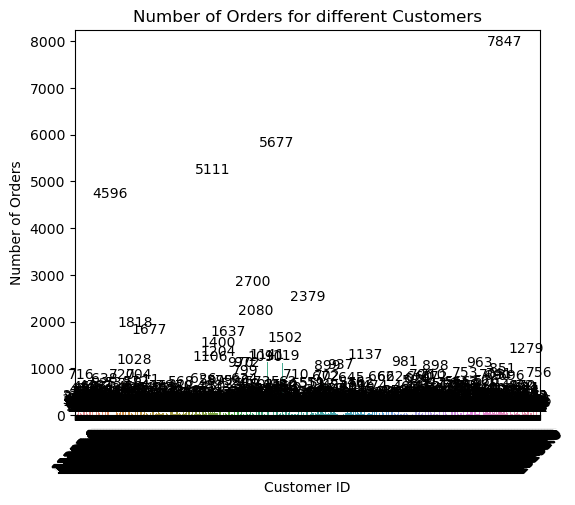

In [30]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x=customer_invoice.index, y=customer_invoice.values)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.xticks(rotation= 45)
for label in ax.containers:
    ax.bar_label(label);

In [31]:
country_invoice = df.groupby(['Country'])['InvoiceNo'].count().sort_values(ascending=False)[:10]
country_invoice

Country
United Kingdom    486286
Germany             9042
France              8408
EIRE                7894
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1967
Portugal            1501
Australia           1185
Name: InvoiceNo, dtype: int64

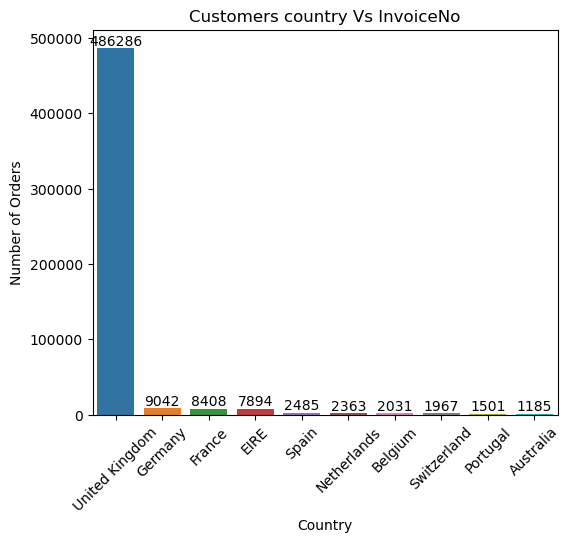

In [32]:
plt.figure(figsize=(6,5))
ax = sns.barplot(x=country_invoice.index, y=country_invoice.values)
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.title('Customers country Vs InvoiceNo')
plt.xticks(rotation=45)
for label in ax.containers:
    ax.bar_label(label)

plt.show() 

### Total_Amount spent by top 10 Customers based on invoiceNo and Country.

In [35]:
money_spent_10 = df.groupby(by=['CustomerID','Country','InvoiceNo'])['Amount_Spent'].sum().sort_values(ascending=False).reset_index()[:10]
money_spent_10

,CustomerID,Country,InvoiceNo,Amount_Spent
0,16446.0,United Kingdom,581483,168469.60
1,12346.0,United Kingdom,541431,77183.60
2,15098.0,United Kingdom,556444,38970.00
3,17450.0,United Kingdom,567423,31698.16
4,12415.0,Australia,556917,22775.93
5,18102.0,United Kingdom,572209,22206.00
6,17450.0,United Kingdom,567381,22104.80
7,12415.0,Australia,563614,21880.44
8,15749.0,United Kingdom,550461,21535.90
9,14646.0,Netherlands,572035,20277.92


In [36]:
money_spent = df.groupby(by=['CustomerID'])['Amount_Spent'].sum().sort_values(ascending=False).reset_index()[:20]
money_spent

,CustomerID,Amount_Spent
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06
5,12415.0,124914.53
6,14156.0,117379.63
7,17511.0,91062.38
8,16029.0,81024.84
9,12346.0,77183.60


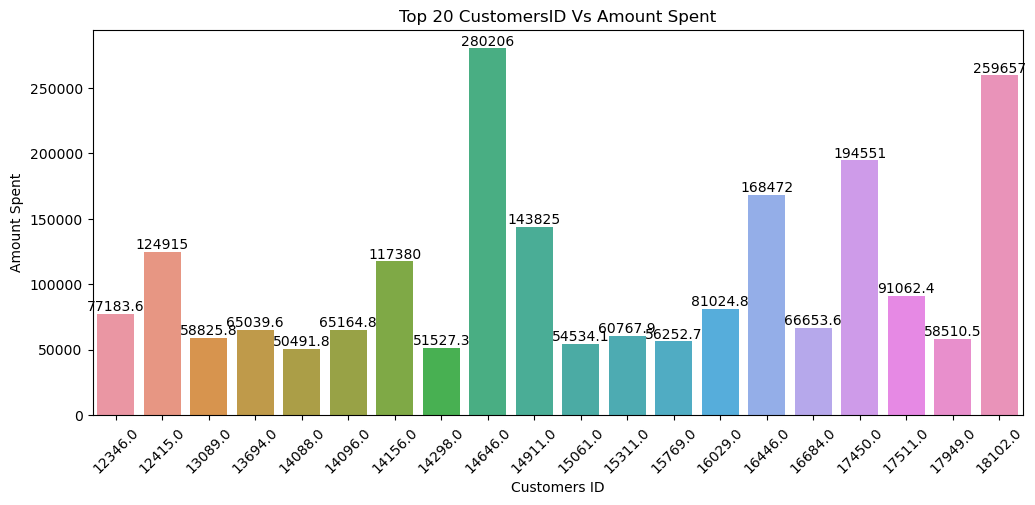

In [37]:
plt.figure(figsize = (12,5))
ax = sns.barplot(x = 'CustomerID',  y = 'Amount_Spent', data= money_spent)
plt.xlabel('Customers ID')
plt.ylabel('Amount Spent')
plt.title('Top 20 CustomersID Vs Amount Spent')
plt.xticks(rotation=45)
for label in ax.containers:
    ax.bar_label(label)

plt.show() 

### How many orders per month?

In [38]:
monthly_sale = df.groupby(['Month'])['InvoiceNo'].count().reindex([1,2,3,4,5,6,7,8,9,10,11,12]).reset_index()
monthly_sale

,Month,InvoiceNo
0,1,34350
1,2,27184
2,3,35915
3,4,29171
4,5,36292
5,6,36056
6,7,38716
7,8,34566
8,9,49323
9,10,59396


In [39]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

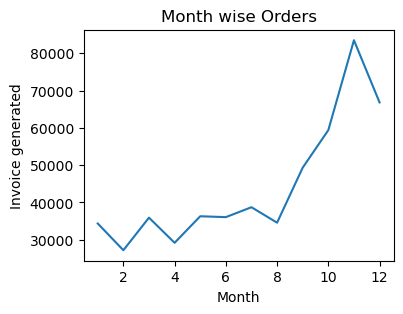

In [40]:
plt.figure(figsize=(4,3))
ax = sns.lineplot(x="Month", y="InvoiceNo", data = monthly_sale )
plt.xlabel("Month")
plt.ylabel("Invoice generated")
plt.title("Month wise Orders")
plt.show()

In [41]:
daily_sale = df.groupby(['Day_Name'])['InvoiceNo'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()
daily_sale

,Day_Name,InvoiceNo
0,Monday,93308
1,Tuesday,99804
2,Wednesday,92559
3,Thursday,101221
4,Friday,80483
5,Sunday,63910


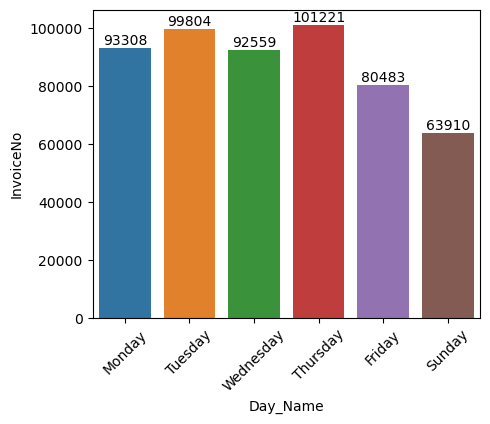

In [42]:
plt.figure(figsize=(5,4))
ax = sns.barplot(x="Day_Name", y="InvoiceNo", data =daily_sale )
plt.xticks(rotation=45)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

## Orders per hour

In [43]:
hourly_sale = df.groupby(['Hour'])['InvoiceNo'].count().reset_index()
hourly_sale

,Hour,InvoiceNo
0,06,1
1,07,379
2,08,8805
3,09,33755
4,10,47895
5,11,56312
6,12,77230
7,13,71075
8,14,66268
9,15,76432


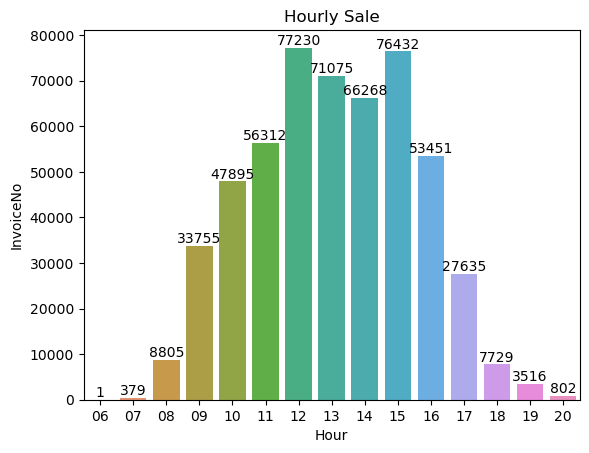

In [44]:
ax = sns.barplot(x="Hour", y= 'InvoiceNo', data =hourly_sale )
plt.title('Hourly Sale')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- The most number of transactions is done between 12 a.m. and 2 p.m., There aren't any transactions after 8 p.m. till 6 a.m.

In [46]:
### Statisticals Summary of UnitPrice
df['UnitPrice'].describe().round(2)

count    531285.00
mean          3.86
std          41.81
min      -11062.06
25%           1.25
50%           2.08
75%           4.13
max       13541.33
Name: UnitPrice, dtype: float64

- From the descriptive statistics for UnitPrice variable, we could see that most ot the sold products are price are quite cheap.
- Now lets see the UnitPrice of products with Description, which unit price is more than 50.

In [47]:
df[df['UnitPrice']>100]['Description'].unique()

array(['rustic  seventeen drawer sideboard', 'dotcom postage',
       'vintage red kitchen cabinet', 'manual', 'amazon fee',
       'regency mirror with shutters', 'love seat antique white metal',
       'vintage blue kitchen cabinet', 'chest natural wood 20 drawers',
       'carriage', 'postage', 'picnic basket wicker 60 pieces',
       'adjust bad debt'], dtype=object)

In [48]:
df[df['UnitPrice']>1000]['Description'].unique()

array(['amazon fee', 'manual', 'postage', 'dotcom postage',
       'adjust bad debt'], dtype=object)

- 3 products which Unitprice is more than 1000.

In [49]:
df[df['UnitPrice']>5000]['Description'].unique()

array(['amazon fee', 'postage', 'adjust bad debt'], dtype=object)

- There are only one product named 'postage' which is more costly.

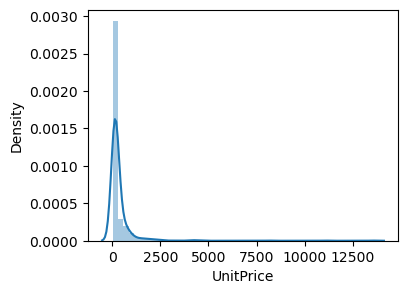

In [50]:
plt.figure(figsize=(4,3))
sns.distplot(df[df['UnitPrice']>50]['UnitPrice'], kde=True)
plt.show()

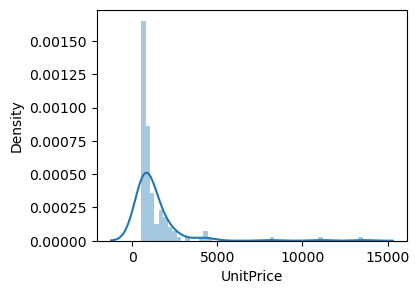

In [51]:
plt.figure(figsize=(4,3))
sns.distplot(df[df['UnitPrice']>500]['UnitPrice'], kde=True)
plt.show()

In [52]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [53]:
print("Transactions were generated in", len(df['Country'].unique()), "different countries")

Transactions were generated in 38 different countries


In [54]:
df[df['Country']=='Unspecified'].count()[6]

244

In [55]:
print("Number of transactions where country is unspecified:", len(df[df['Country']=='Unspecified']))

Number of transactions where country is unspecified: 446


###  Adding new attributes.
- RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- **Recency(R)**: Days since last purchase
- **Frequency(F)**: Total number of purchases
- **Monetory value(M)**: Total money, customer spent.

In [56]:
## Calculating Monetary(Amount_Spent)
rfm_m = df.groupby('CustomerID')['Amount_Spent'].sum().reset_index().rename(columns={'Amount_Spent':'Amount'})
rfm_m.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [57]:
## Calculating Frequency.
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns= {'InvoiceNo':'Frequency'})
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [58]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [59]:
# Compute the maximum date to know the last transaction date
max_date = max(df['InvoiceDate'])

# Compute the difference between max date and transaction date
df['Diff'] = max_date - df['InvoiceDate']

# Compute last transaction date to get the recency of customers
rfm_p = df.groupby('CustomerID')['Diff'].min().reset_index()

## Extract number of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days 

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')

In [60]:
rfm = rfm.rename(columns={'Diff':'Recency'})
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [61]:
rfm.describe()

,CustomerID,Amount,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2053.793018,91.708689,91.518322
std,1721.889758,8988.248381,228.792852,100.009747
min,12346.000000,0.000000,1.000000,0.000000
25%,13812.500000,307.245000,17.000000,17.000000
50%,15299.000000,674.450000,41.000000,50.000000
75%,16778.500000,1661.640000,100.000000,141.000000
max,18287.000000,280206.020000,7847.000000,373.000000


<AxesSubplot:>

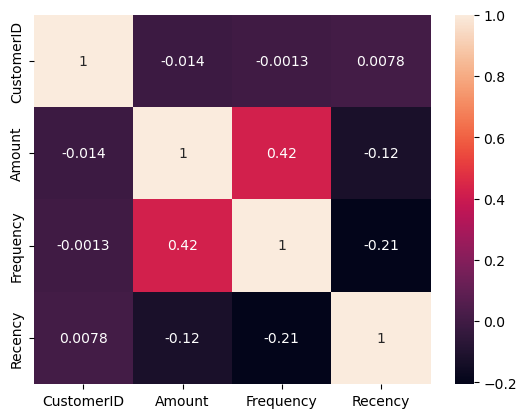

In [62]:
sns.heatmap(rfm.corr(), annot=True)

- There is a negative correlation between Recency-Frequency and Recency-Monetary, but there is a positive correlation between Frequency-Monetary.Low value of recency means less recent transactions while high frequency means more frequent transactions and high Monetary value means high spending on transactions.

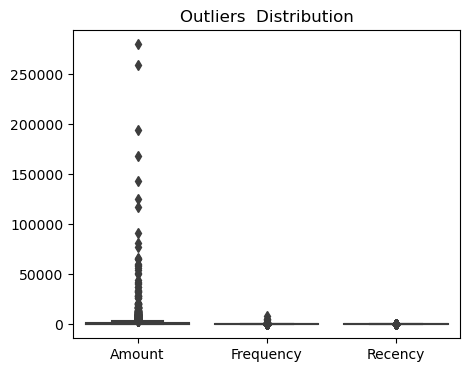

In [63]:
# Outlier Analysis of Amount, Frequency and Recency

features = ['Amount','Frequency','Recency']
plt.figure(figsize=(5,4))
sns.boxplot(data = rfm[features])
plt.title("Outliers  Distribution")
plt.show()

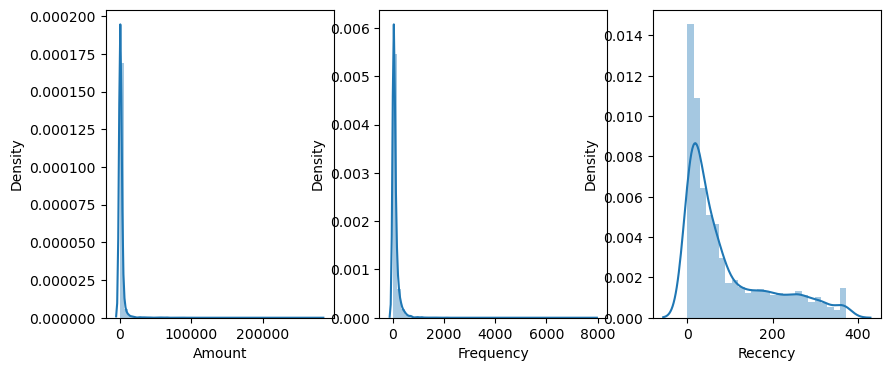

In [64]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.distplot( rfm['Amount'], kde=True)

plt.subplot(1,3,2)
sns.distplot( rfm['Frequency'], kde=True)

plt.subplot(1,3,3)
sns.distplot( rfm['Recency'], kde=True)
plt.show()

In [65]:
print(rfm['Amount'].skew() )
print(rfm['Frequency'].skew())
print(rfm['Recency'].skew())

19.326985305561823
18.106242903118684
1.2463568823921845


In [66]:
rfm['Amount'] = np.log(rfm['Amount'] + 0.01)
rfm['Frequency'] = np.log(rfm['Frequency'] + 0.01)
rfm['Recency'] = np.log(rfm['Recency'] + 0.01)

In [72]:
print(rfm['Amount'].skew() )
print(rfm['Frequency'].skew())
print(rfm['Recency'].skew())

0.21982103052670493
-0.21726111425599065
-1.927448596683192


In [73]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,11.253942,0.009950,5.783856
1,12347.0,8.368696,5.204062,0.009950
2,12348.0,7.494013,3.434310,4.304200
3,12349.0,7.471682,4.290596,2.890927
4,12350.0,5.812368,2.833801,5.733374


In [74]:
X = rfm.iloc[:, 1:]

In [75]:
X.head()

,Amount,Frequency,Recency
0,11.253942,0.009950,5.783856
1,8.368696,5.204062,0.009950
2,7.494013,3.434310,4.304200
3,7.471682,4.290596,2.890927
4,5.812368,2.833801,5.733374


In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Modelling(K-Means Clutering)

**Elbow Curve**

- **Find the optimal number of cluster.**

In [77]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1,7):
    k_model = KMeans(n_clusters = k, init = 'k-means++',random_state=0)
    k_model.fit(X)
    wcss.append(k_model.inertia_)
print(wcss)

[13016.999999999998, 7199.288582255605, 5540.639135473086, 4425.249237043868, 3823.287309187381, 3294.900529763173]


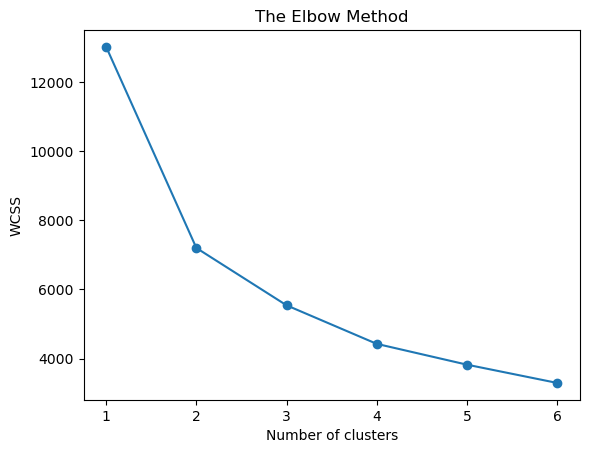

In [78]:
plt.plot(range(1,7),wcss, '-o')
plt.xticks(range(1,7))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- Optimal number of clusters is 3.

### K-Means Model

In [79]:
#Modelling
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=0)

#Predict
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[0 2 0 ... 1 2 0]


In [80]:
rfm['cluster'] = pd.DataFrame(y_kmeans)
rfm.head()

,CustomerID,Amount,Frequency,Recency,cluster
0,12346.0,11.253942,0.009950,5.783856,0
1,12347.0,8.368696,5.204062,0.009950,2
2,12348.0,7.494013,3.434310,4.304200,0
3,12349.0,7.471682,4.290596,2.890927,0
4,12350.0,5.812368,2.833801,5.733374,1


In [81]:
rfm[rfm['cluster']==1]

,CustomerID,Amount,Frequency,Recency,cluster
4,12350.0,5.812368,2.833801,5.733374,1
6,12353.0,4.488749,1.388791,5.313255,1
8,12355.0,6.129943,2.565718,5.361339,1
14,12361.0,5.246550,2.303585,5.656027,1
16,12363.0,6.313566,3.135929,4.691440,1
...,...,...,...,...,...
4332,18277.0,4.704020,2.080691,4.043227,1
4333,18278.0,5.158538,2.198335,4.290596,1
4334,18280.0,5.196340,2.303585,5.624054,1
4335,18281.0,4.392348,1.947338,5.193012,1


In [82]:
rfm['cluster'].value_counts(normalize=True)

0    0.449643
1    0.388108
2    0.162249
Name: cluster, dtype: float64

Text(0, 0.5, 'Monetary')

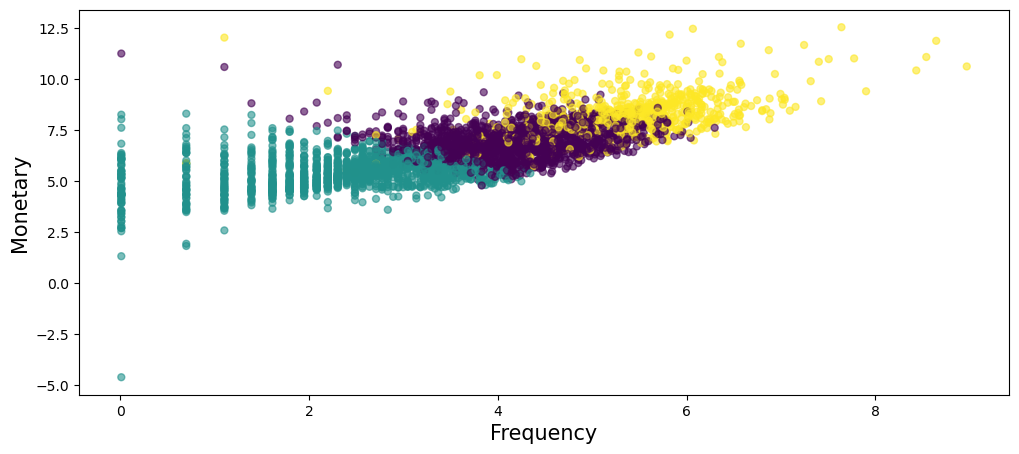

In [83]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

## add to dataframe
rfm['cen_x'] = rfm.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
rfm['cen_y'] = rfm.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
rfm['c'] = rfm.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

# Plot clusters
plt.figure(figsize=(12,5))
plt.scatter(rfm.Frequency, rfm.Amount, c=rfm.cluster, alpha = 0.6, s=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

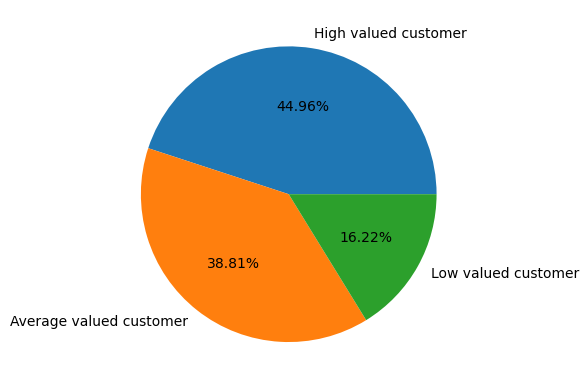

In [84]:
customer_seg = rfm['cluster'].value_counts().index
customer_val = rfm['cluster'].value_counts().values

plt.pie(customer_val, labels = ['High valued customer','Average valued customer','Low valued customer'], autopct = '%1.2f%%')
plt.show()

This plot clearly indicates that green cluster is high value customer cohort (Cluster 0) and blue cluster is Lost/low value customer cohort (Cluster 1) while yellow cluster is average value customer cohort (Cluster 2)
High Value :- Frequent spending customers with high monetary transactions and had transacted recently

Low Value/ Lost :- Customers with least frequency and monetary spending and made purchase long time ago.

Average Value :- Customers who made their transactions some time ago with less frequency and monetary value. 